<a href="https://colab.research.google.com/github/FMDR-YU/r4ds/blob/main/C24Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q3. Extract the diamonds that have very high and very low residuals.
Is there anything unusual about these diamonds? Are the particularly bad or good, or do you think these are pricing errors?

In [ ]:
library(dplyr)
library(ggplot2)
library(modelr)

Comment:

In [ ]:
diamonds2 <- diamonds %>% 
  filter(carat <= 2.5) %>% 
  mutate(lprice = log2(price), lcarat = log2(carat))

mod_diamond <- lm(lprice ~ lcarat, data = diamonds2)

diamonds2 <- diamonds2 %>% 
  add_residuals(mod_diamond, "lresid")

resid_quants <- quantile(diamonds2$lresid)

filtered <- diamonds2 %>% 
  filter( 
    !((lresid < resid_quants[["25%"]]) & (lresid > resid_quants[["75%"]])) 
    )

Draw boxplot

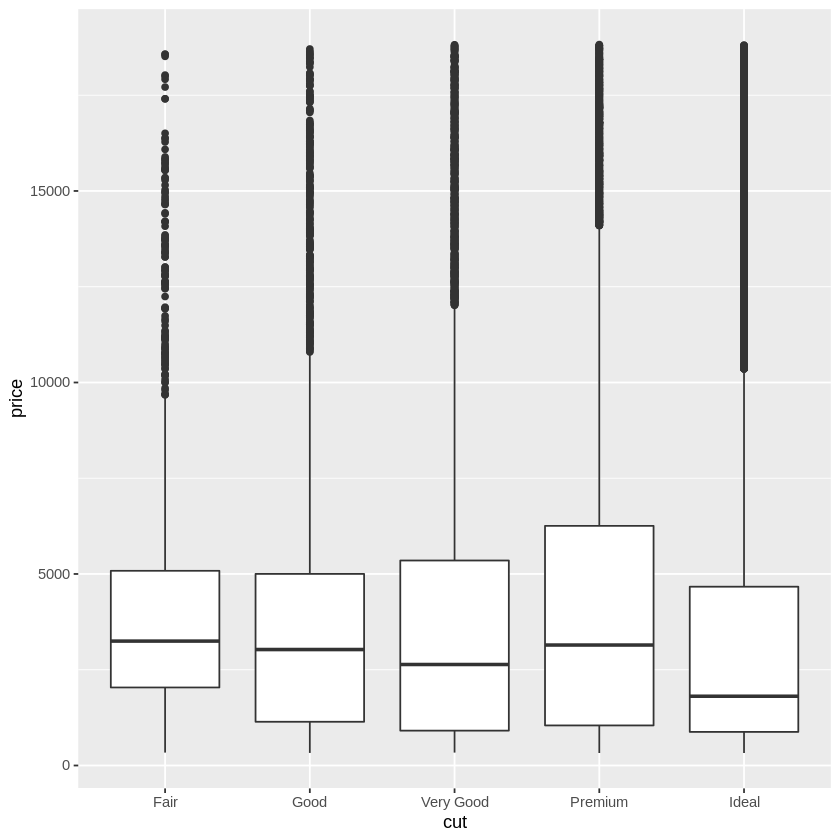

In [ ]:
ggplot(filtered, aes(cut, price)) + geom_boxplot()